In [51]:
!pip install nltk
!pip install python-crfsuite
!pip install sklearn-crfsuite

In [52]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('/content/Eps10-all_indo_man_tag_corpus_model.crf.tagger')
hasil = ct.tag_sents([['Xiaomi yi', 'action', 'kamera', 'bagus', 'buat', 'video', 'bisa', 'di', 'jadikan', 'pertimbangan', 'nihhh']])
print(hasil)

[[('Xiaomi yi', 'NN'), ('action', 'NN'), ('kamera', 'NN'), ('bagus', 'JJ'), ('buat', 'IN'), ('video', 'NN'), ('bisa', 'MD'), ('di', 'IN'), ('jadikan', 'VB'), ('pertimbangan', 'NN'), ('nihhh', 'JJ')]]


In [53]:
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import numpy as np
import sklearn_crfsuite
import seaborn as sns
%matplotlib inline
from nltk import pos_tag
from nltk.tag import CRFTagger
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import warnings

In [54]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

plt.style.use('ggplot')
sns.set(style='whitegrid')

warnings.filterwarnings('ignore')

pd.set_option('max_colwidth', 180)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [55]:
stemming_data = pd.read_csv('/content/Eps10-stemming_xiaomi.csv')

stemming_data.shape

(101, 2)

In [56]:
stemming_data.head(10)

,tweet,sentiment
0,pake hp xiaomi,Positive
1,xiaomi yi action kamera bagus video jadi timbang nihhh,Positive
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,Positive
3,hpmu opo sawangane jernih koyok iph xiaomi euy,Positive
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,Positive
5,bahagia hape xiaomi remote apa hahahaha,Positive
6,pb nya xiaomi awet wet wet wetttttt,Positive
7,bantu jelasin lg niat beli xiaomi niih nyesel,Positive
8,gppkok tp kalo hp ip trs tema xiaomi kaya langgar ham,Positive
9,hp xiaomi tema iphone dosa gak sih,Positive


In [57]:
stemming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      100 non-null    object
 1   sentiment  101 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [58]:
stemming_data.duplicated().sum()

0

In [59]:
ct = CRFTagger()
ct.set_model_file('/content/Eps10-all_indo_man_tag_corpus_model.crf.tagger')

In [60]:
def pos_tagging_crf(text):
    if not isinstance(text, str):
        text = str(text)
    tokens = word_tokenize(text)
    pos_tags = ct.tag(tokens)
    return pos_tags

stemming_data['pos_tags'] = stemming_data['tweet'].apply(pos_tagging_crf)
stemming_data[['tweet', 'pos_tags']].head(10)

,tweet,pos_tags
0,pake hp xiaomi,"[(pake, FW), (hp, FW), (xiaomi, NN)]"
1,xiaomi yi action kamera bagus video jadi timbang nihhh,"[(xiaomi, NN), (yi, NN), (action, NN), (kamera, NN), (bagus, JJ), (video, NN), (jadi, VB), (timbang, NN), (nihhh, JJ)]"
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,"[(ya, NN), (allah, NN), (jauh, JJ), (goda, VB), (clickbait, VB), (line, FW), (today, FW), (beritaberita, FW), (browser, FW), (xiaomi, NN)]"
3,hpmu opo sawangane jernih koyok iph xiaomi euy,"[(hpmu, VB), (opo, FW), (sawangane, FW), (jernih, FW), (koyok, FW), (iph, FW), (xiaomi, NN), (euy, FW)]"
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,"[(numpang, NN), (nanya, RB), (hapenya, VB), (xiaomi, NN), (ya, NN), (kalo, NN), (iya, NN), (tipe, FW), (jernih, FW), (kamera, FW), (iphone, FW)]"
5,bahagia hape xiaomi remote apa hahahaha,"[(bahagia, NN), (hape, NN), (xiaomi, NN), (remote, FW), (apa, WH), (hahahaha, NN)]"
6,pb nya xiaomi awet wet wet wetttttt,"[(pb, NN), (nya, NN), (xiaomi, NN), (awet, FW), (wet, FW), (wet, FW), (wetttttt, FW)]"
7,bantu jelasin lg niat beli xiaomi niih nyesel,"[(bantu, VB), (jelasin, NN), (lg, NN), (niat, NN), (beli, VB), (xiaomi, NN), (niih, NN), (nyesel, NNP)]"
8,gppkok tp kalo hp ip trs tema xiaomi kaya langgar ham,"[(gppkok, NN), (tp, FW), (kalo, FW), (hp, FW), (ip, FW), (trs, FW), (tema, NN), (xiaomi, NN), (kaya, JJ), (langgar, SC), (ham, VB)]"
9,hp xiaomi tema iphone dosa gak sih,"[(hp, NN), (xiaomi, NN), (tema, NN), (iphone, NN), (dosa, NN), (gak, NN), (sih, JJ)]"


In [61]:
def filter_nouns_crf(pos_tags):
    nouns = [word for word, tag in pos_tags if tag in ['NN', 'NNP']]
    return ' '.join(nouns)

In [62]:
stemming_data['nouns'] = stemming_data['pos_tags'].apply(filter_nouns_crf)

stemming_data[['tweet', 'nouns']].head(10)

,tweet,nouns
0,pake hp xiaomi,xiaomi
1,xiaomi yi action kamera bagus video jadi timbang nihhh,xiaomi yi action kamera video timbang
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,ya allah xiaomi
3,hpmu opo sawangane jernih koyok iph xiaomi euy,xiaomi
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,numpang xiaomi ya kalo iya
5,bahagia hape xiaomi remote apa hahahaha,bahagia hape xiaomi hahahaha
6,pb nya xiaomi awet wet wet wetttttt,pb nya xiaomi
7,bantu jelasin lg niat beli xiaomi niih nyesel,jelasin lg niat xiaomi niih nyesel
8,gppkok tp kalo hp ip trs tema xiaomi kaya langgar ham,gppkok tema xiaomi
9,hp xiaomi tema iphone dosa gak sih,hp xiaomi tema iphone dosa gak


In [63]:
stemming_data.head(10)

,tweet,sentiment,pos_tags,nouns
0,pake hp xiaomi,Positive,"[(pake, FW), (hp, FW), (xiaomi, NN)]",xiaomi
1,xiaomi yi action kamera bagus video jadi timbang nihhh,Positive,"[(xiaomi, NN), (yi, NN), (action, NN), (kamera, NN), (bagus, JJ), (video, NN), (jadi, VB), (timbang, NN), (nihhh, JJ)]",xiaomi yi action kamera video timbang
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,Positive,"[(ya, NN), (allah, NN), (jauh, JJ), (goda, VB), (clickbait, VB), (line, FW), (today, FW), (beritaberita, FW), (browser, FW), (xiaomi, NN)]",ya allah xiaomi
3,hpmu opo sawangane jernih koyok iph xiaomi euy,Positive,"[(hpmu, VB), (opo, FW), (sawangane, FW), (jernih, FW), (koyok, FW), (iph, FW), (xiaomi, NN), (euy, FW)]",xiaomi
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,Positive,"[(numpang, NN), (nanya, RB), (hapenya, VB), (xiaomi, NN), (ya, NN), (kalo, NN), (iya, NN), (tipe, FW), (jernih, FW), (kamera, FW), (iphone, FW)]",numpang xiaomi ya kalo iya
5,bahagia hape xiaomi remote apa hahahaha,Positive,"[(bahagia, NN), (hape, NN), (xiaomi, NN), (remote, FW), (apa, WH), (hahahaha, NN)]",bahagia hape xiaomi hahahaha
6,pb nya xiaomi awet wet wet wetttttt,Positive,"[(pb, NN), (nya, NN), (xiaomi, NN), (awet, FW), (wet, FW), (wet, FW), (wetttttt, FW)]",pb nya xiaomi
7,bantu jelasin lg niat beli xiaomi niih nyesel,Positive,"[(bantu, VB), (jelasin, NN), (lg, NN), (niat, NN), (beli, VB), (xiaomi, NN), (niih, NN), (nyesel, NNP)]",jelasin lg niat xiaomi niih nyesel
8,gppkok tp kalo hp ip trs tema xiaomi kaya langgar ham,Positive,"[(gppkok, NN), (tp, FW), (kalo, FW), (hp, FW), (ip, FW), (trs, FW), (tema, NN), (xiaomi, NN), (kaya, JJ), (langgar, SC), (ham, VB)]",gppkok tema xiaomi
9,hp xiaomi tema iphone dosa gak sih,Positive,"[(hp, NN), (xiaomi, NN), (tema, NN), (iphone, NN), (dosa, NN), (gak, NN), (sih, JJ)]",hp xiaomi tema iphone dosa gak


In [64]:
stemming_data.to_csv('Xiaomi_nouns_POS_tagging.csv', index=False)

In [65]:
X = stemming_data['nouns']
y = stemming_data['sentiment']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7096774193548387
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         9
    Positive       0.71      1.00      0.83        22

    accuracy                           0.71        31
   macro avg       0.35      0.50      0.42        31
weighted avg       0.50      0.71      0.59        31



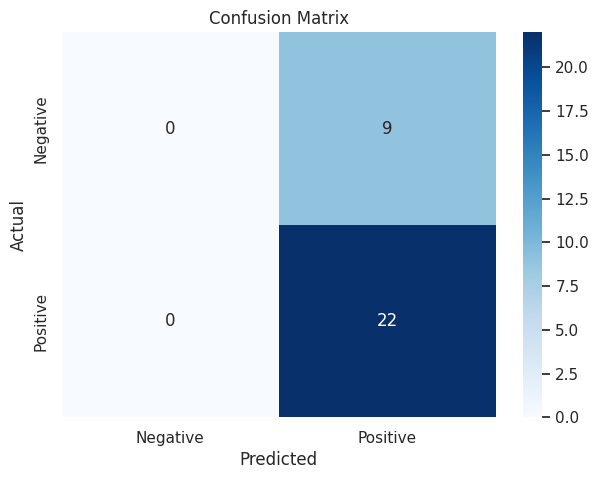

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

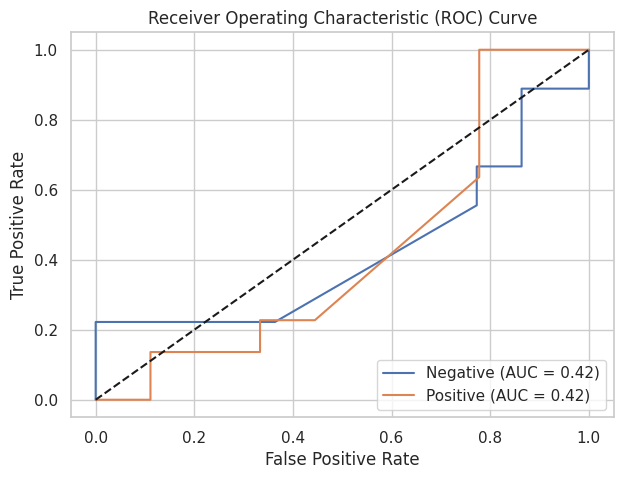

In [69]:
y_pred_proba = model.predict_proba(X_test_vect)
plt.figure(figsize=(7, 5))
for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_proba[:, i], pos_label=True)
    roc_auc = roc_auc_score(y_test == class_label, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()